In [56]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import random as rn
import cv2
import os

# Загрузка данных

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


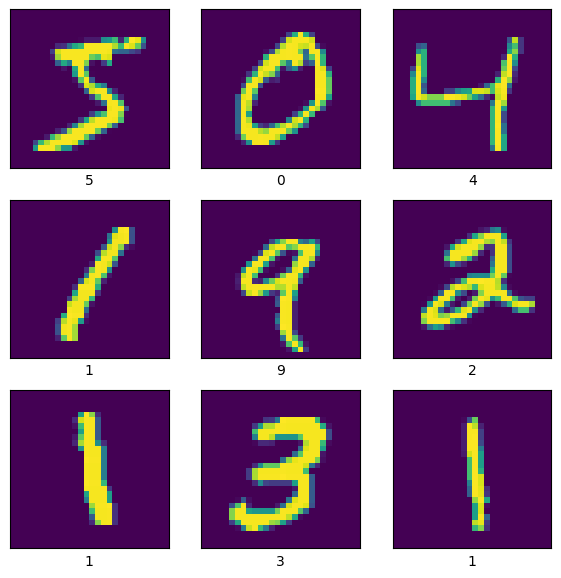

In [3]:
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(train_labels[i])
    plt.imshow(train_images[i])
plt.show()

# Построение и обучение модели

In [4]:
# model_mnist = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

model_mnist = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8,(3,3),activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_mnist.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,182,314 (4.51 MB)

 Trainable params: 1,182,314 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

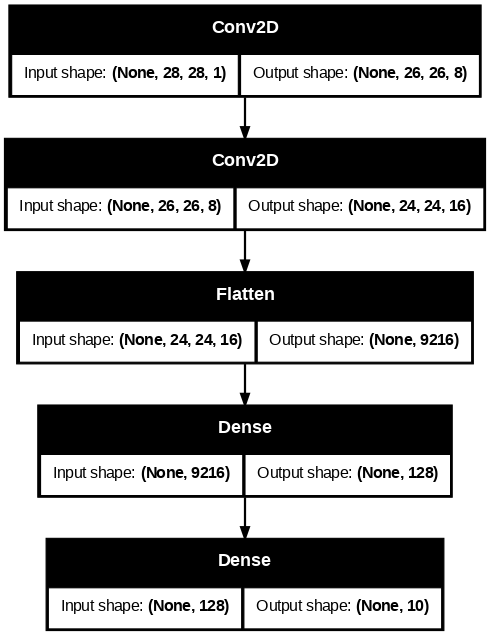

In [5]:
model_mnist.summary()

tf.keras.utils.plot_model(model_mnist, show_shapes=True,dpi=80)

In [6]:
history_mnist=model_mnist.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9160 - loss: 0.2702 - val_accuracy: 0.9840 - val_loss: 0.0516
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9865 - loss: 0.0440 - val_accuracy: 0.9853 - val_loss: 0.0464
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9923 - loss: 0.0229 - val_accuracy: 0.9869 - val_loss: 0.0397
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9962 - loss: 0.0128 - val_accuracy: 0.9870 - val_loss: 0.0479
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9967 - loss: 0.0101 - val_accuracy: 0.9865 - val_loss: 0.0468
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9980 - loss: 0.0065 - val_accuracy: 0.9838 - val_loss: 0.0521
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9983 - loss: 0.0051 - val_accuracy: 0.9874 - val_loss: 0.0486
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9986 - loss: 0.0044 - val_accur

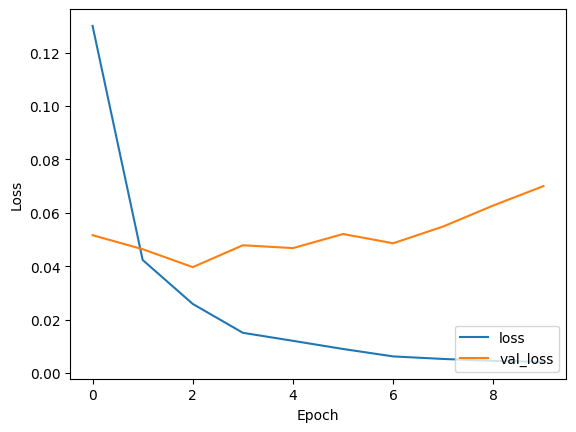

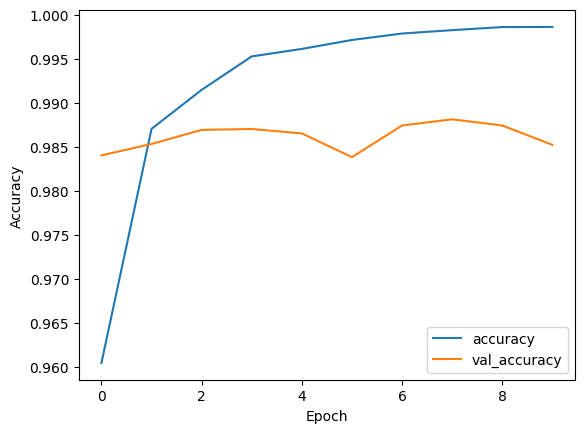

In [7]:
plt.plot(history_mnist.history['loss'], label='loss')
plt.plot(history_mnist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0, 3])
plt.legend(loc='lower right')
plt.show()

plt.plot(history_mnist.history['accuracy'], label='accuracy')
plt.plot(history_mnist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.3, 1.1])
plt.legend(loc='lower right')
plt.show()

# Проверка качества тестовой выборке

313/313 - 1s - 2ms/step - accuracy: 0.9852 - loss: 0.0700
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



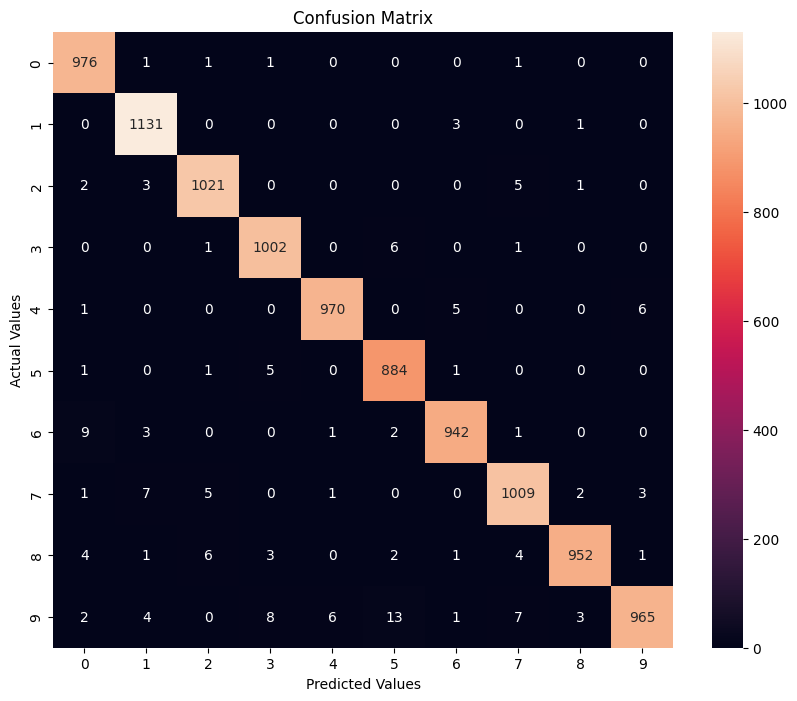

In [8]:
test_loss, test_acc = model_mnist.evaluate(test_images, test_labels, verbose=2)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

preds=model_mnist.predict(test_images)
preds_classes=np.argmax(preds,axis=1)

print(classification_report(test_labels, preds_classes))

cm = confusion_matrix(test_labels, preds_classes)

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Провекрка качества на собственных данных

In [ ]:
!mkdir /content/hand_test
!unzip /content/hand_test.zip -d /content/hand_test

In [54]:
def resize_to_28x28(img):
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img_h, img_w= img.shape
    dim_size_max = max(img.shape)

    if dim_size_max == img_w:
        im_h = (26 * img_h) // img_w
        if im_h <= 0 or img_w <= 0:
            print("Invalid Image Dimention: ", im_h, img_w, img_h)
        tmp_img = cv2.resize(img, (26,im_h),0,0,cv2.INTER_NEAREST)
    else:
        im_w = (26 * img_w) // img_h
        if im_w <= 0 or img_h <= 0:
            print("Invalid Image Dimention: ", im_w, img_w, img_h)
        tmp_img = cv2.resize(img, (im_w, 26),0,0,cv2.INTER_NEAREST)

    out_img = np.zeros((28, 28), dtype=np.ubyte)

    nb_h, nb_w = out_img.shape
    na_h, na_w = tmp_img.shape
    y_min = (nb_w) // 2 - (na_w // 2)
    y_max = y_min + na_w
    x_min = (nb_h) // 2 - (na_h // 2)
    x_max = x_min + na_h

    out_img[x_min:x_max, y_min:y_max] = tmp_img

    return out_img

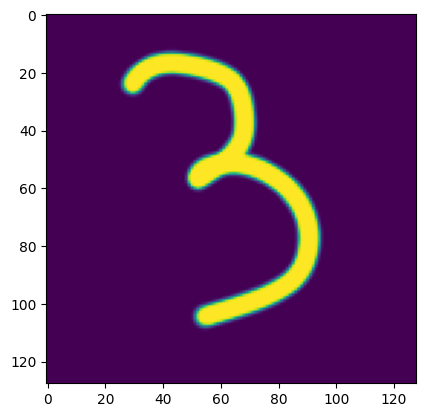

(28, 28)


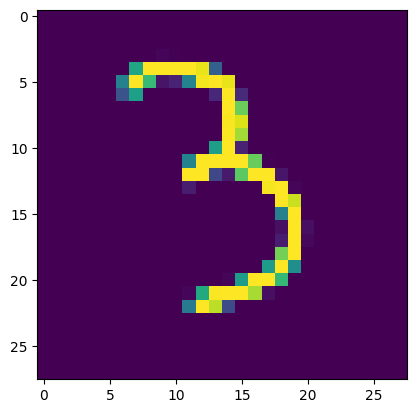

In [53]:
img=cv2.imread('/content/test.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = (255-img)
plt.imshow(img)
plt.show()

handtest_img = resize_to_28x28(img)
print(handtest_img.shape)
plt.imshow(handtest_img)
plt.show()

(10, 28, 28)
(10,)
3


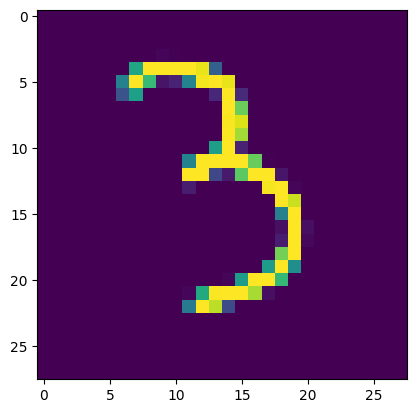

0


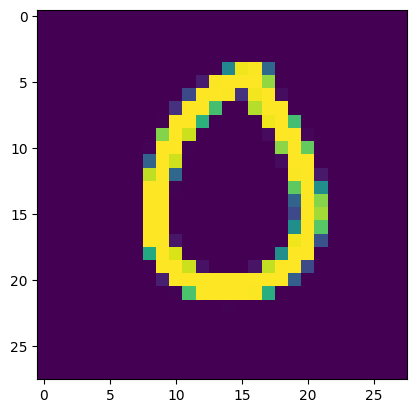

6


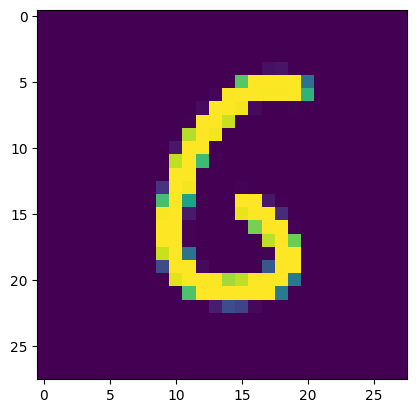

2


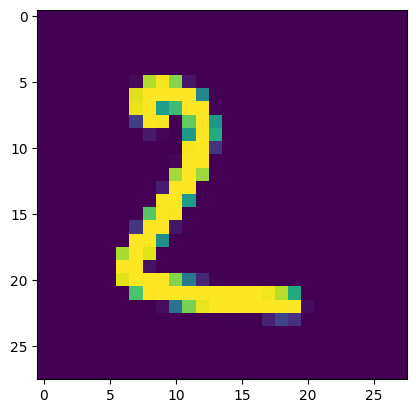

7


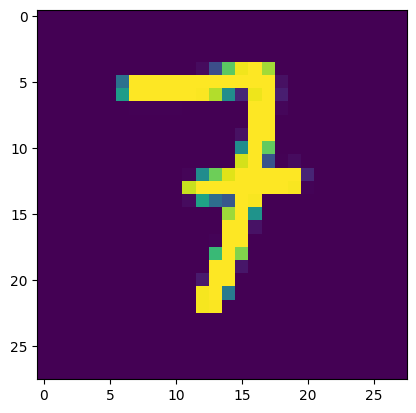

8


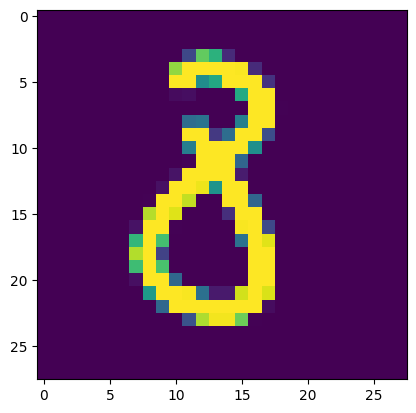

9


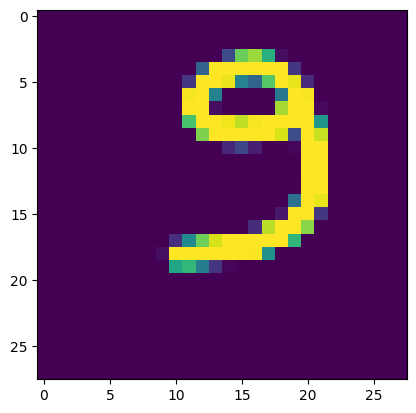

1


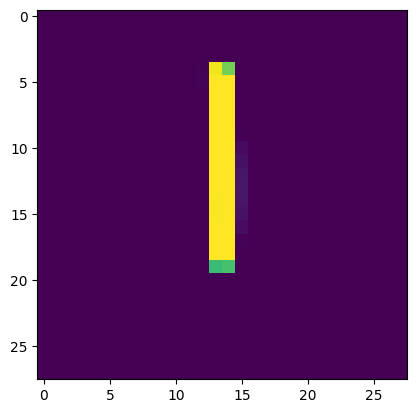

4


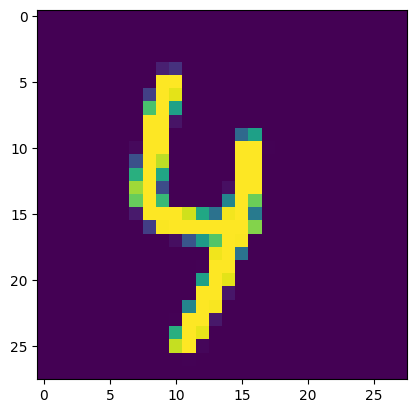

5


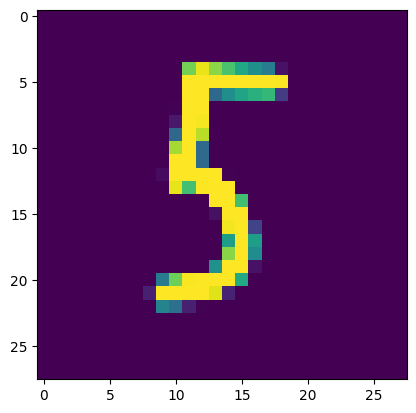

In [67]:
hand_root = '/content/hand_test/'
hand_imgs=[]
hand_true=[]

for fl in os.listdir(hand_root):
  img=cv2.imread(hand_root+fl)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = (255-img)
  handtest_img = resize_to_28x28(img)
  hand_imgs.append(handtest_img)
  hand_true.append(int(fl.split('test')[1].split('.')[0]))

hand_imgs = np.array(hand_imgs)
hand_true = np.array(hand_true)
print(hand_imgs.shape)
print(hand_true.shape)

for i in range(len(hand_imgs)):
  print(hand_true[i])
  plt.imshow(hand_imgs[i])
  plt.show()

In [68]:
hand_preds=model_mnist.predict(hand_imgs)

for i in range(len(hand_preds)):
  print(f"Предсказанное значение - {np.argmax(hand_preds[i])}, Истинное значение - {hand_true[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Предсказанное значение - 3, Истинное значение - 3
Предсказанное значение - 0, Истинное значение - 0
Предсказанное значение - 6, Истинное значение - 6
Предсказанное значение - 2, Истинное значение - 2
Предсказанное значение - 3, Истинное значение - 7
Предсказанное значение - 3, Истинное значение - 8
Предсказанное значение - 2, Истинное значение - 9
Предсказанное значение - 1, Истинное значение - 1
Предсказанное значение - 4, Истинное значение - 4
Предсказанное значение - 5, Истинное значение - 5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       0.33      1.00      0.50         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.70        10
   macro avg       0.58      0.70      0.62        10
weighted avg       0.58      0.70      0.62        10



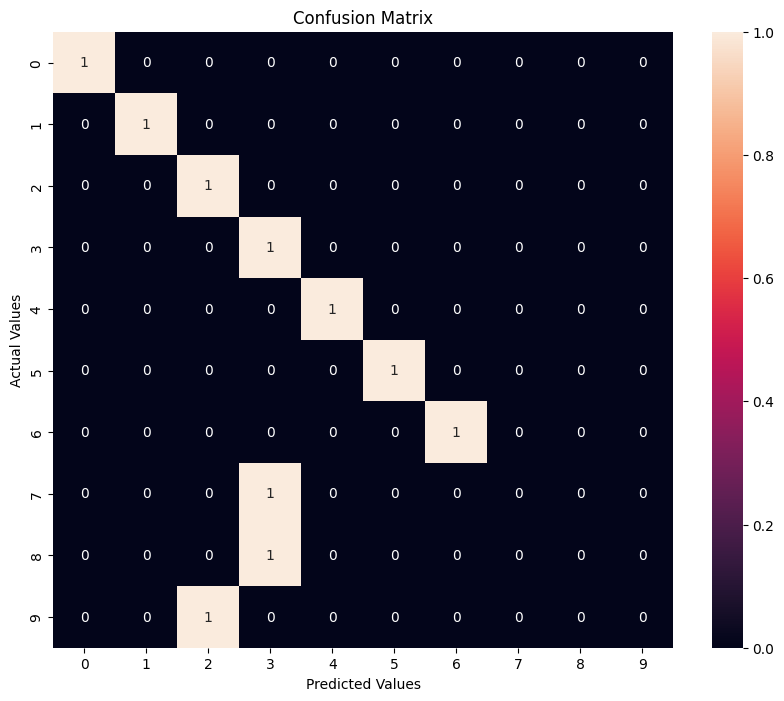

In [69]:
hand_classes=np.argmax(hand_preds,axis=1)

print(classification_report(hand_true, hand_classes))

cm = confusion_matrix(hand_true, hand_classes)

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()